<a href="https://colab.research.google.com/github/Aniket18-bot/BIG-DATA-ANALYSIS/blob/main/BigdataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark seaborn matplotlib

In [2]:
!pip install pandas openpyxl

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc, avg, count, from_unixtime, to_date
import matplotlib.pyplot as plt
import seaborn as sns
spark = SparkSession.builder.appName("AmazonReviewAnalysis").getOrCreate()

# Load dataset (replace with your file path)
# Example: "amazon_reviews.csv"
data_path = "/content/drive/MyDrive/Colab Notebooks/amazon_reviews.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Inspect schema
df.printSchema()


root
 |-- review_id: string (nullable = true)
 |-- asin: string (nullable = true)
 |-- helpful: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- unixReviewTime: string (nullable = true)



In [6]:
print("Total Rows:", df.count())
print("Columns:", df.columns)

Total Rows: 982820
Columns: ['review_id', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID', 'reviewerName', 'summary', 'unixReviewTime']


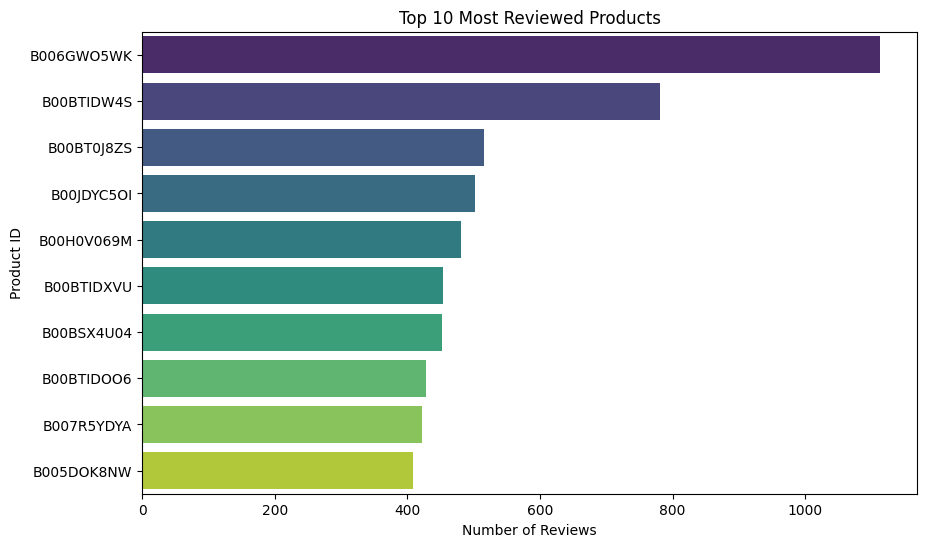

In [7]:
# Analysis 1: Top reviewed products

top_products = df.groupBy("asin").count().orderBy(desc("count"))
top_products_pd = top_products.limit(10).toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x="count", y="asin", data=top_products_pd, palette="viridis", hue="asin", legend=False)
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Product ID")
plt.show()

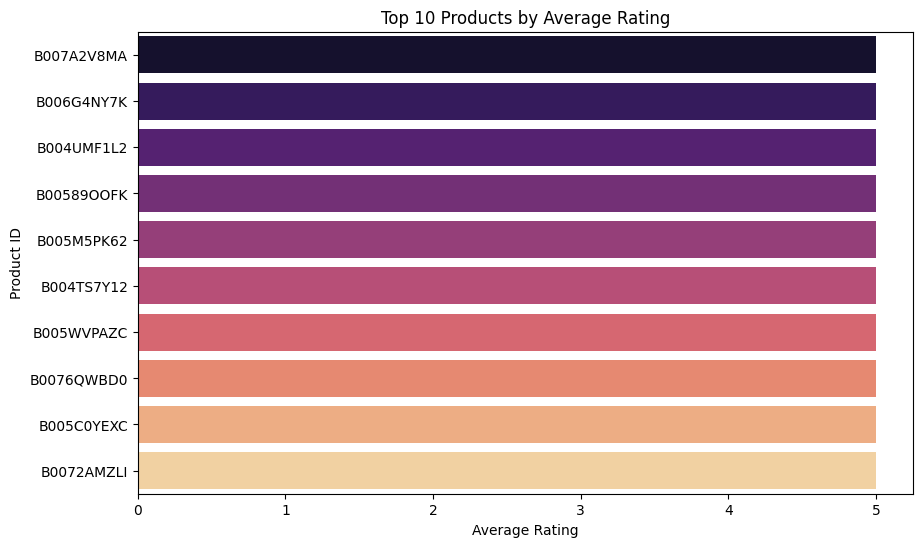

In [8]:
# Analysis 2: Average rating by product

avg_ratings = df.groupBy("asin").agg(avg("overall").alias("avg_rating")).orderBy(desc("avg_rating"))
avg_ratings_pd = avg_ratings.limit(10).toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x="avg_rating", y="asin", data=avg_ratings_pd, palette="magma", hue="asin", legend=False)
plt.title("Top 10 Products by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Product ID")
plt.show()

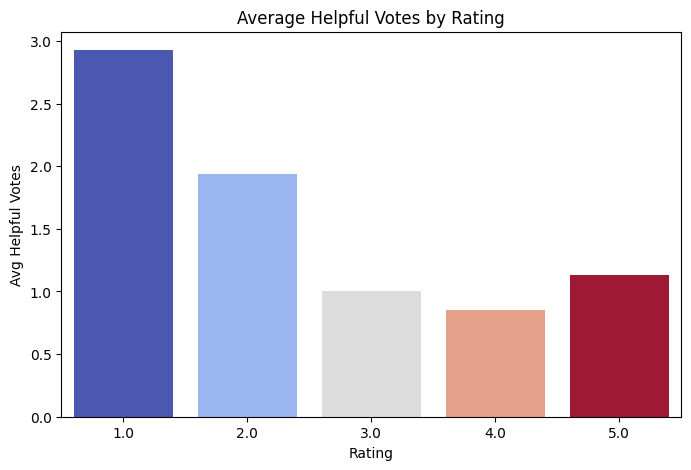

In [9]:
# Analysis 3: Helpfulness vs Rating

from pyspark.sql.functions import col, avg, regexp_extract

df_parsed_helpful = df.withColumn("helpful_votes", regexp_extract(col("helpful"), r"\[(\d+),", 1).cast("int"))

helpfulness_rating = df_parsed_helpful.groupBy("overall").agg(avg("helpful_votes").alias("avg_helpful_votes"))
helpfulness_rating_pd = helpfulness_rating.toPandas()

plt.figure(figsize=(8,5))
sns.barplot(x="overall", y="avg_helpful_votes", data=helpfulness_rating_pd, palette="coolwarm", hue="overall", legend=False)
plt.title("Average Helpful Votes by Rating")
plt.xlabel("Rating")
plt.ylabel("Avg Helpful Votes")
plt.show()

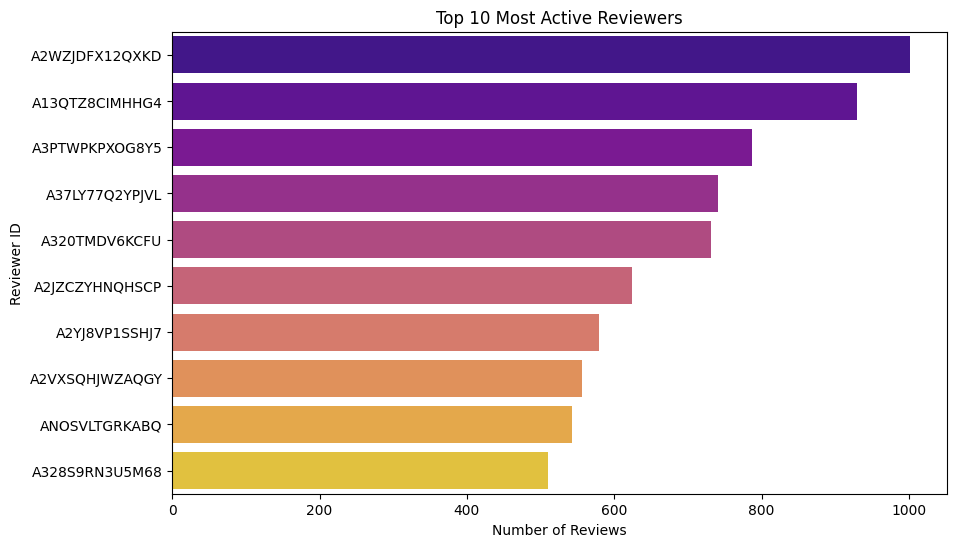

In [10]:
# Analysis 4: Most active reviewers

top_reviewers = df.groupBy("reviewerID").count().orderBy(desc("count"))
top_reviewers_pd = top_reviewers.limit(10).toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x="count", y="reviewerID", data=top_reviewers_pd, palette="plasma", hue="reviewerID", legend=False)
plt.title("Top 10 Most Active Reviewers")
plt.xlabel("Number of Reviews")
plt.ylabel("Reviewer ID")
plt.show()

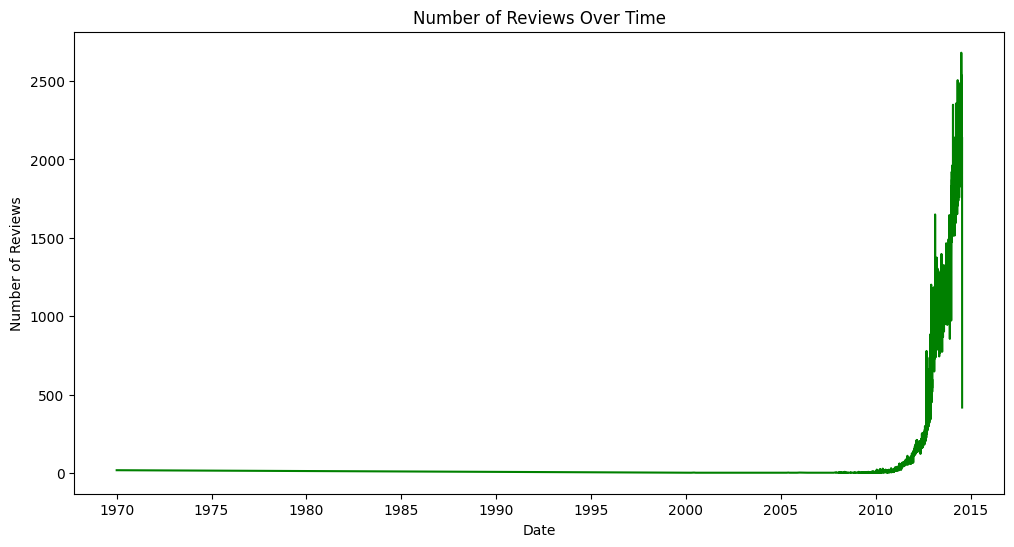

In [11]:
# Analysis 5: Review Trends Over Time

df_with_date = df.withColumn("review_date", to_date(from_unixtime(col("unixReviewTime"))))
reviews_over_time = df_with_date.groupBy("review_date").count().orderBy("review_date")
reviews_over_time_pd = reviews_over_time.toPandas()

plt.figure(figsize=(12,6))
plt.plot(reviews_over_time_pd["review_date"], reviews_over_time_pd["count"], color="green")
plt.title("Number of Reviews Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.show()